In [1]:
!pip install nltk
!pip install textblob
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [2]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

C:\Users\Ertuğrul\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",200)
pd.set_option("display.float_format",lambda x:"%.2f" % x)

In [4]:
#Text PreProcessing

df=pd.read_csv("nlp/datasets/amazon_reviews.csv",sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [5]:
#Normalizing Case Folding

df["reviewText"]=df["reviewText"].str.lower()
df["reviewText"]

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [6]:
#Punctuations
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]"," ")

In [7]:
#Numbers
df["reviewText"]=df["reviewText"].str.replace("\d"," ")
df["reviewText"]

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [8]:
#Stop Words
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ertuğrul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
sw=stopwords.words("english")
df["reviewText"]=df["reviewText"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["reviewText"]

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       works expected. sprung higher capacity. think ...
3       think worked great.had diff. bran 64gb card we...
4       bought retail packaging, arrived legit, orange...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspire, ...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable. comes optional adapt...
4913    good amount space stuff want do, fits gopro. say?
4914    heard bad things 64gb micro sd card crapping w...
Name: reviewText, Length: 4915, dtype: object

In [10]:
#Rare Words

temp_df=pd.Series(" ".join(df["reviewText"]).split()).value_counts()
drops=temp_df[temp_df <= 1]

df["reviewText"]=df["reviewText"].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df["reviewText"]

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       works expected. higher capacity. think made bi...
3       think worked 64gb card went south 3 one held p...
4       bought retail packaging, arrived legit, versio...
                              ...                        
4910    bought sandisk 16gb class 10 use htc 3 months,...
4911    used capabilities samsung galaxy note 10. grea...
4912    great card fast reliable. comes optional adapt...
4913    good amount space stuff want do, fits gopro. say?
4914    heard bad things 64gb micro sd card crapping w...
Name: reviewText, Length: 4915, dtype: object

In [11]:
#Tokenization
#nltk.download("punkt")
from textblob import TextBlob
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, 64gb, card, went, south, 3, on...
4    [bought, retail, packaging, arrived, legit, ve...
Name: reviewText, dtype: object

In [12]:
#Lemmatization
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ertuğrul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
df["reviewText"]= df["reviewText"].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]))
df["reviewText"]

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       work expected. higher capacity. think made bit...
3       think worked 64gb card went south 3 one held p...
4       bought retail packaging, arrived legit, versio...
                              ...                        
4910    bought sandisk 16gb class 10 use htc 3 months,...
4911    used capability samsung galaxy note 10. greatl...
4912    great card fast reliable. come optional adapte...
4913     good amount space stuff want do, fit gopro. say?
4914    heard bad thing 64gb micro sd card crapping we...
Name: reviewText, Length: 4915, dtype: object

In [14]:
#Text Visualization
#Terim Frekanslarının Oluşturulması

tf=df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns=["words","tf"]
tf.sort_values("tf",ascending=False)

,words,tf
26,card,4130.00
15,work,1879.00
7,phone,1220.00
109,memory,1192.00
65,sd,1133.00
...,...,...
1626,years.i,2.00
4240,bare,2.00
4239,bust,2.00
5851,4.9,2.00


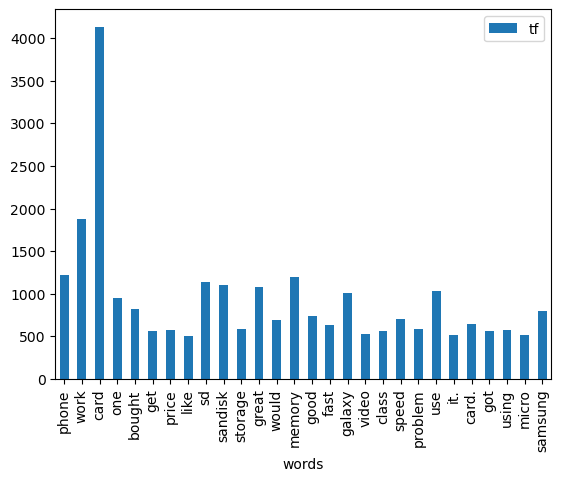

In [15]:
#Barplot

tf[tf["tf"]>500].plot.bar(x="words",y="tf")
plt.show()

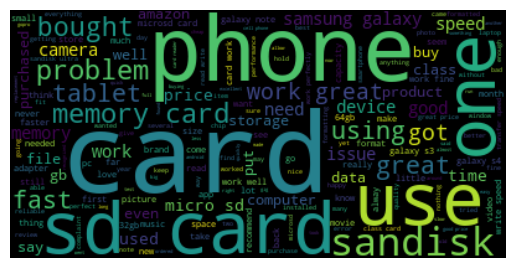

In [16]:
#WordCloud

text = " ".join(i for i in df.reviewText)

wordcloud= WordCloud().generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


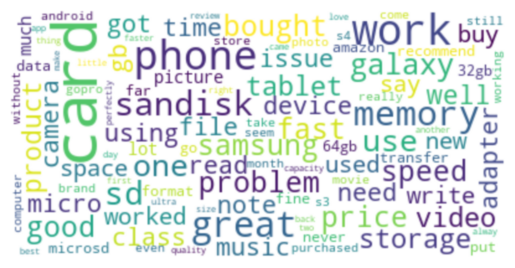

In [19]:
wordcloud2=WordCloud(max_font_size=50,
                     max_words=100,
                     background_color="white",
                     collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud2,interpolation="bicubic")
plt.axis("off")
plt.show()
#wordcloud2.to_file("wordcloud.png")
#WordCloud içine collocations=False parametresini eklersek birden çok kez aynı terimi göstermez.



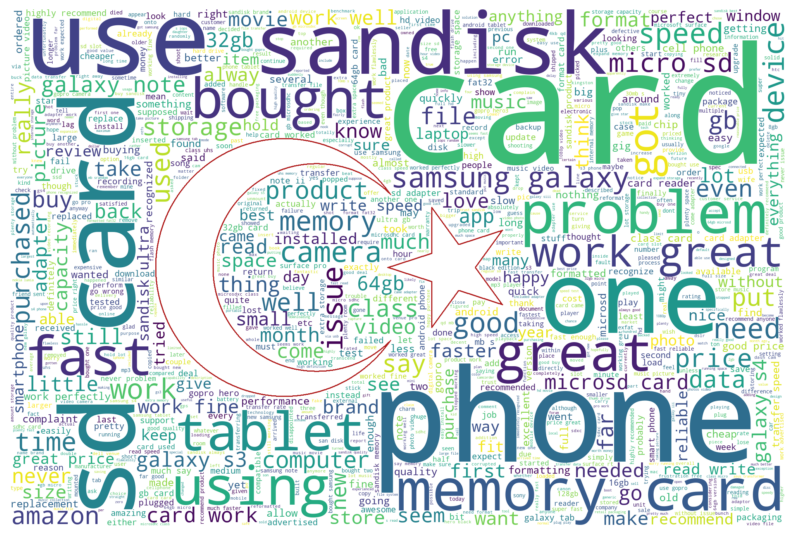

In [18]:
tr_mask=np.array(Image.open("nlp/tr.png"))

wc=WordCloud(background_color="white",
             max_words=1000,
             mask=tr_mask,
             contour_width=3,
             contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
#Sentiment Analysis

nltk.download("vader_lexicon")

sia=SentimentIntensityAnalyzer()

sia.polarity_scores("I liked it but it is not good as the other one")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ertuğrul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.222, 'neu': 0.642, 'pos': 0.136, 'compound': -0.298}

In [22]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0   0.00
1   0.00
2   0.40
3   0.65
4   0.86
5   0.00
6   0.91
7   0.81
8   0.00
9   0.92
Name: reviewText, dtype: float64

In [23]:
df["polarity_score"]=df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])


In [37]:
#Case 1: overall >= 3 and compound < 0 (high score but negative reviews)
pd.set_option("display.max.colwidth",None)
high_score_negative_reviews=df[(df["overall"] ==5 ) & (df["polarity_score"] <0)][["overall","reviewText"]]
high_score_negative_reviews.value_counts

<bound method DataFrame.value_counts of       overall  \
14       5.00   
19       5.00   
20       5.00   
24       5.00   
34       5.00   
...       ...   
4848     5.00   
4861     5.00   
4886     5.00   
4898     5.00   
4907     5.00   

                                                                                                                                                                                                                                                                                                                                                                                                             reviewText  
14                                                                                                                                                                                                                                                                                                                                                heard c

In [38]:

low_score_positive_reviews=df[(df["overall"] ==1 ) & (df["polarity_score"] >0)][["overall","reviewText","polarity_score"]]
low_score_positive_reviews.head() 

,overall,reviewText,polarity_score
32,1.00,"bought 2 sandisk 32 gb microsd , used galaxy note galaxy one , phone started saying removed , recognize :) thought luck , plugged 2nd one :) 2 month died suddenly ! lost buying sandisk .. ever",0.53
38,1.00,"bougth micro sd card got kingston, tell sandisk quality, best, phone read 64gb fast, transfer speed pc amazing, looking additional storage phone, music, picture type files, good quality material one year memory damaged delete put new file it, format memory, tried format phone, pc, camera like 64gb data memory available read delete it, bought memory used backup data android device readable memory write data more, hope sandisk make better product total buy samsung memory card expected better quality.",0.96
143,1.00,"old sandisk sd card still works. thought new card would reliable, microsd card failed yesterday inside phone. used adapter connect computer, bought directly amazon third party vendor, know genuine sandisk.",0.03
177,1.00,"use sdxc card 128gb, card unreadable arrival. pc said needed formatted, last resort let one try (windows sdxc could format it. way back amazon. glad return easy!",0.78
213,1.00,"used sandisk photography, course went time new samsung galaxy s3 internal microsd card. spent extra buck comparably ""no name"" micro sd card bought variant. took quite picture even transferred album computer show friend less two months, sandisk microsd card started acting up. recognized, stopped, removed itself, reinstalled onto phone - taken immediately tried recover anything could thing hit waited long morning, reason turned phone on, card show blank. neither window pc, mac, even detect card yes, tried two different adapters, tried sandisk recovery even though checked file type apparently lost picture there. top off, gf's cheap ""no name"" card never issue exact phone keep chugging along premium product fails use two thanks. going back lexar, failed yet. also getting rid sandisk card dslr's, case. fact sandisk first card thats ever failed me, new card inspire confidence. buy use",0.15


In [ ]:
#Sentiment Modeling

df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["sentiment_label"]=df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

df["sentiment_label"].value_counts()

df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

y= df["sentiment_label"]

X= df["reviewText"] # ölçülebilir, üzerinde matematiksel işlemler yapılabilir hale getirmemiz gerekir(Bu haliyle sadece bir text)




In [61]:
#Elimdeki numerik olmayan metinleri numeriğe çevirebileyim ki üzerinde ML algoritmalarını
#kullanabileyim. Bunun için en yaygın olan 3 metod:

#Count Vectors: frekans temsiller
#TF-IDF Vectors: normalize edilmiş frekans temsiller
#Word Embeddings (Word2Vec, GloVe, BERT vs)

#Bu yukarıdaki 3 metodu da kendi içlerinde 3farklı aşağıdaki yapı ile birleştirerek kullanabiliriz.
# words - kelimelerin numerik temsilleri

# characters - karakterlerin numerik temsilleri

# ngram - N-gram'lar birlikte kullanılan kelimelerin kombinasyonlarını gösterir ve feature üretmek için kullanılır.
a = "N Gram calisma mantigi islenisi"

TextBlob(a).ngrams(3)

[WordList(['N', 'Gram', 'calisma']),
 WordList(['Gram', 'calisma', 'mantigi']),
 WordList(['calisma', 'mantigi', 'islenisi'])]

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

corpus= ["This is the first document.",
         "This document is the second document.",
         "And this is the third one.",
         "Is this the first document?"]

# Count Vector - words frekans

vectorizer= CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X_c.toarray())

print("\n# # # # # # # # # # # # # \n")


# Count Vector - ngram frekans

vectorizer2= CountVectorizer(analyzer="word",ngram_range=(2,2))
X_n=vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names_out())
print(X_n.toarray())





['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]

# # # # # # # # # # # # # 

['and this' 'document is' 'first document' 'is the' 'is this'
 'second document' 'the first' 'the second' 'the third' 'third one'
 'this document' 'this is' 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


In [64]:
vectorizer3= CountVectorizer()
X_count=vectorizer3.fit_transform(X)

print(vectorizer3.get_feature_names_out()[10:15])

X_count.toarray()[10:15]

['1080p' '10gb' '10mb' '11' '119']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
#TF-IDF Vectors: normalize edilmiş frekans temsiller
#TF-IDF, Count Vector yönteminin ortaya çıkarabileceği bazı yanlılıkların önüne geçmesi beklenir.
#Kelimelerin hem bulunduğu satırdaki sıklıkları, hem de diğer tüm satırlardaki sıklıkları göz önünde bulundurularak yapılan bir normalizasyon işlemi.

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_word_vectorizer=TfidfVectorizer()
X_tf_idf_word=tf_idf_word_vectorizer.fit_transform(X)

tf_idf_ngram_vectorizer=TfidfVectorizer(ngram_range=(2,3))
X_tf_idf_ngram=tf_idf_ngram_vectorizer.fit_transform(X)




In [70]:
#Sentiment Modeling
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression().fit(X_tf_idf_word,y)

cross_val_score(log_model,
                X_tf_idf_word,
                y,
                scoring="accuracy",
                cv=5).mean()


#Yeni bir yorumu denemek için, yorumu vectorizer ile öğrenmeye uygun hale getirmeliyiz.
new_review=pd.Series("this product is great.")

new_review=TfidfVectorizer().fit(X).transform(new_review)

log_model.predict(new_review)

random_review=pd.Series(df["reviewText"].sample(1).values)

new_review2=TfidfVectorizer().fit(X).transform(random_review)


log_model.predict(new_review2)


array([1])

In [73]:
#Random Forest


#Count Vectors
rf_model=RandomForestClassifier().fit(X_count,y)
cross_val_score(rf_model,X_count,y,cv=5,n_jobs=-1).mean()
#0.8465



#TF-IDF Word-Level
rf_model=RandomForestClassifier().fit(X_tf_idf_word,y)
cross_val_score(rf_model,X_tf_idf_word,y,cv=5,n_jobs=-1).mean()
#0.8315


#TF-IDF N-Gram

rf_model=RandomForestClassifier().fit(X_tf_idf_ngram,y)
cross_val_score(rf_model,X_tf_idf_ngram,y,cv=5,n_jobs=-1).mean()

#0.7816

0.7816887080366226

In [75]:
#Hiperparametre Optimizasyonu

rf_model= RandomForestClassifier(random_state=17)

rf_params={"max_depth":[8,None],
           "max_features":[7,"auto"],
            "min_samples_split":[2,5,8],
            "n_estimators":[100,200]}


rf_best_grid=GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=True).fit(X_count,y)

rf_best_grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

In [76]:
rf_final=rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count,y)

cross_val_score(rf_final,X_count,y,cv=5,n_jobs=-1).mean()

0.8476093591047814